Q. 1. Furier transform of the sinc function.

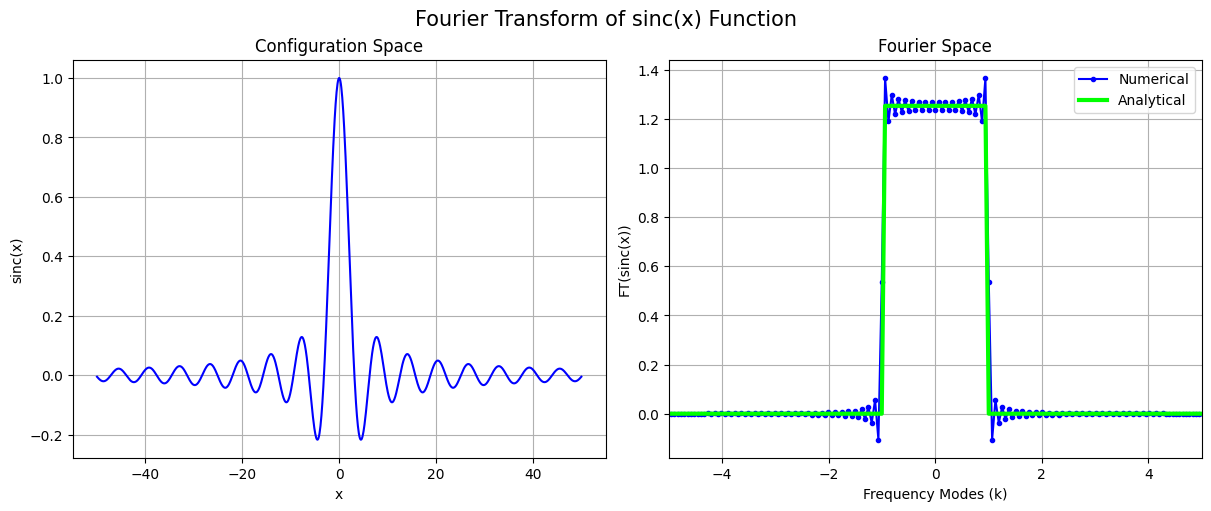

In [1]:
import numpy as np
import numpy.fft as ft
import matplotlib.pyplot as plt

# Define sinc function
def sinc(x):
    return np.where(x == 0.0, 1.0, np.sin(x) / x)

# Define box function in Fourier space
def box(k):
    return 0.5 * np.sqrt(np.pi / 2.0) * (np.sign(k + 1) - np.sign(k - 1))

# Parameters
num_points = 1024
x_min, x_max = -50.0, 50.0

# Generate x values and calculate spacing
x = np.linspace(x_min, x_max, num_points)
dx = (x_max - x_min) / (num_points - 1)

# Compute Discrete Fourier Transform of sinc function
dft_sinc = ft.fft(sinc(x), norm='ortho')

# Generate frequency components
k = ft.fftfreq(num_points, d=dx) * 2 * np.pi

# Calculate phase factor and inverse Fourier transform to obtain Fourier transform
phase = np.exp(-1.0j * k * x_min)
ft_sinc = np.sqrt(num_points / (2.0 * np.pi)) * dx * phase * dft_sinc

# Shift zero frequency component to the center of the array
ft_sinc_shifted = ft.fftshift(ft_sinc)
k_shifted = ft.fftshift(k)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 5))
fig.suptitle("Fourier Transform of sinc(x) Function", size=15)

# Configuration space plot
ax1.plot(x, sinc(x), color='blue')
ax1.set_title("Configuration Space")
ax1.set_xlabel("x")
ax1.set_ylabel("sinc(x)")
ax1.grid(True)

# Fourier space plot
ax2.plot(k_shifted, ft_sinc_shifted.real, '.-', color='blue', label="Numerical")
ax2.plot(k_shifted, box(k_shifted), color='#00FF00', label="Analytical", lw=3)
ax2.set_title("Fourier Space")
ax2.set_xlabel("Frequency Modes (k)")
ax2.set_ylabel("FT(sinc(x))")
ax2.set_xlim(-5.0, 5.0)
ax2.legend()
ax2.grid(True)

# Show the plot
plt.show()
